# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [16]:
import pandas as pd
import numpy as np

In [17]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/rez_sample_03ALL/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Branch,Option,Build Time,Binary Size
0,ixz-00001-00002,"['--enable-encoders=lzma1,lzma2', '--enable-de...",10.9520,1072480.0
1,ixz-00001-00003,"['--enable-debug', '--enable-encoders=lzma1,lz...",NaN,NaN
2,ixz-00001-00004,"['--enable-debug', '--enable-encoders=lzma1,po...",11.3420,1064448.0
3,ixz-00001-00005,"['--enable-debug', '--enable-encoders=lzma1,ia...",NaN,1215672.0
4,ixz-00001-00006,"['--enable-debug', '--enable-encoders=lzma1,po...",NaN,1215672.0
...,...,...,...,...
375,ixz-00020-00015,"['--enable-encoders=lzma1,arm', '--enable-deco...",10.7795,1092248.0
376,ixz-00020-00016,"['--enable-debug', '--enable-encoders=lzma1,lz...",NaN,1058496.0
377,ixz-00020-00017,"['--enable-encoders=lzma1,powerpc', '--enable-...",NaN,NaN
378,ixz-00020-00018,"['--enable-encoders=lzma1,lzma2', '--enable-de...",10.6740,1080984.0


In [18]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")

df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Branch,Option,Build Time,Binary Size,Br0,Br1,Br2
0,ixz-00001-00002,"['--enable-encoders=lzma1,lzma2', '--enable-de...",10.9520,1072480.0,ixz,00001,00002
1,ixz-00001-00003,"['--enable-debug', '--enable-encoders=lzma1,lz...",NaN,NaN,ixz,00001,00003
2,ixz-00001-00004,"['--enable-debug', '--enable-encoders=lzma1,po...",11.3420,1064448.0,ixz,00001,00004
3,ixz-00001-00005,"['--enable-debug', '--enable-encoders=lzma1,ia...",NaN,1215672.0,ixz,00001,00005
4,ixz-00001-00006,"['--enable-debug', '--enable-encoders=lzma1,po...",NaN,1215672.0,ixz,00001,00006
...,...,...,...,...,...,...,...
375,ixz-00020-00015,"['--enable-encoders=lzma1,arm', '--enable-deco...",10.7795,1092248.0,ixz,00020,00015
376,ixz-00020-00016,"['--enable-debug', '--enable-encoders=lzma1,lz...",NaN,1058496.0,ixz,00020,00016
377,ixz-00020-00017,"['--enable-encoders=lzma1,powerpc', '--enable-...",NaN,NaN,ixz,00020,00017
378,ixz-00020-00018,"['--enable-encoders=lzma1,lzma2', '--enable-de...",10.6740,1080984.0,ixz,00020,00018


In [19]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                        \
Br1        00002    00004    00008    00012    00015    00018    00020   
Br2                                                                      
00001    12.8395  12.5385  12.6185  12.4605  12.4260  11.4335  11.6475   
00002        NaN  11.0000  11.3640  11.1065  11.8520  10.2835  10.3605   
00004    11.6010      NaN  12.7880  11.7335  11.8470  10.7215  10.7265   
00005        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
00008    12.6135  12.3040      NaN  12.3560  12.2145  11.2760  11.5235   
00009        NaN      NaN   0.4235      NaN      NaN      NaN      NaN   
00010        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
00012    11.2350  11.3230  11.4415      NaN  11.1230  10.0605  10.3240   
00013        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
00015    11.6475  11.7670  11.7270  11.6345      NaN  10.6535  10.7795   
00017        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
00018    11.8615  11.4625  11.3600  11.2820  11.3190      NaN  10.6740   
00020    11.0255  10.9245  12.1930  10.9895  11.2745  10.2980      NaN   

                                                     
Br1      00001  00010  00009   00005  00017   00013  
Br2                                                  
00001      NaN    NaN    NaN     NaN    NaN     NaN  
00002  10.9520    NaN    NaN     NaN    NaN     NaN  
00004  11.3420    NaN    NaN     NaN    NaN     NaN  
00005      NaN  0.399    NaN     NaN    NaN     NaN  
00008  12.0075    NaN  1.348     NaN    NaN     NaN  
00009      NaN    NaN    NaN     NaN    NaN     NaN  
00010      NaN    NaN    NaN  0.8695    NaN     NaN  
00012  10.6270    NaN    NaN     NaN    NaN     NaN  
00013      NaN    NaN    NaN     NaN  0.607     NaN  
00015  11.0965    NaN    NaN     NaN    NaN     NaN  
00017      NaN    NaN    NaN     NaN    NaN  0.9615  
00018  11.1255    NaN    NaN     NaN    NaN     NaN  
00020  10.9585    NaN    NaN     NaN    NaN     NaN

In [20]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00018)"
00002,"(Build Time, 00018)"
00004,"(Build Time, 00018)"
00005,"(Build Time, 00010)"
00008,"(Build Time, 00009)"
00009,"(Build Time, 00008)"
00010,"(Build Time, 00005)"
00012,"(Build Time, 00018)"


In [21]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  1215672.0  1209072.0  1215672.0  1067256.0  1108144.0   
00002   1072480.0        NaN        NaN  1072480.0        NaN        NaN   
00004   1064448.0  1064448.0  1209072.0        NaN        NaN  1108144.0   
00005   1215672.0  1072480.0  1209072.0  1064448.0        NaN  1108144.0   
00006   1215672.0  1072480.0  1209072.0  1064448.0        NaN        NaN   
00008   1180656.0  1180656.0        NaN  1180656.0        NaN        NaN   
00009         NaN        NaN        NaN        NaN        NaN        NaN   
00010   1215672.0  1072480.0  1209072.0  1064448.0  1067256.0  1108144.0   
00012   1037416.0  1037416.0        NaN  1037416.0        NaN        NaN   
00013   1215672.0  1072480.0  1209072.0  1064448.0  1067256.0  1108144.0   
00014   1215672.0  1072480.0  1209072.0  1064448.0        NaN  1108144.0   
00015   1092248.0  1092248.0        NaN  1092248.0        NaN        NaN   
00016   1215672.0  1072480.0  1209072.0  1064448.0  1067256.0  1108144.0   
00017         NaN        NaN        NaN        NaN        NaN        NaN   
00018   1080984.0  1080984.0  1209072.0  1080984.0  1067256.0  1108144.0   
00019   1215672.0  1072480.0  1209072.0  1064448.0  1067256.0        NaN   
00020   1058496.0  1058496.0  1209072.0  1058496.0  1067256.0  1108144.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001  1145960.0  1215672.0  1153072.0  1005216.0  1050248.0  1215672.0   
00002        NaN  1072480.0        NaN        NaN        NaN  1072480.0   
00004  1145960.0  1064448.0  1153072.0  1005216.0  1050248.0  1064448.0   
00005  1145960.0  1180656.0  1153072.0  1005216.0  1050248.0  1037416.0   
00006        NaN  1180656.0  1153072.0        NaN  1050248.0  1037416.0   
00008        NaN        NaN  1153072.0        NaN        NaN  1180656.0   
00009        NaN  1180656.0        NaN        NaN        NaN        NaN   
00010  1145960.0  1180656.0  1153072.0        NaN  1050248.0  1037416.0   
00012        NaN  1037416.0        NaN        NaN        NaN        NaN   
00013  1145960.0  1180656.0        NaN  1005216.0        NaN  1037416.0   
00014        NaN  1180656.0        NaN  1005216.0        NaN  1037416.0   
00015        NaN  1092248.0        NaN        NaN        NaN  1092248.0   
00016  1145960.0  1180656.0  1153072.0  1005216.0  1050248.0  1037416.0   
00017        NaN        NaN        NaN        NaN        NaN        NaN   
00018  1145960.0  1080984.0  1153072.0  1005216.0  1050248.0  1080984.0   
00019  1145960.0  1180656.0  1153072.0        NaN  1050248.0  1037416.0   
00020  1145960.0  1058496.0  1153072.0  1005216.0  1050248.0  1058496.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  1067432.0  1140664.0  1215672.0  1290136.0  1005520.0  1215672.0   
00002        NaN        NaN  1072480.0        NaN        NaN  1072480.0   
00004  1067432.0  1140664.0  1064448.0  1290136.0  1005520.0  1064448.0   
00005  1067432.0  1140664.0  1092248.0  1290136.0  1005520.0  1080984.0   
00006  1067432.0  1140664.0  1092248.0  1290136.0  1005520.0  1080984.0   
00008        NaN        NaN  1180656.0        NaN        NaN  1180656.0   
00009        NaN        NaN        NaN        NaN        NaN        NaN   
00010  1067432.0  1140664.0  1092248.0  1290136.0  1005520.0  1080984.0   
00012        NaN        NaN  1037416.0        NaN        NaN  1037416.0   
00013        NaN  1140664.0  1092248.0  1290136.0  1005520.0  1080984.0   
00014    

In [22]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,12.8395,12.280571,11.4335
00002,11.8520,10.988357,10.2835
00004,12.7880,11.537071,10.7215
00005,0.3990,0.399000,0.3990
00008,12.6135,10.705375,1.3480
00009,0.4235,0.423500,0.4235
00010,0.8695,0.869500,0.8695
00012,11.4415,10.876286,10.0605


In [23]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,12.8395,12.280571,11.4335
00004,12.7880,11.537071,10.7215
00018,11.8615,11.297786,10.6740
00015,11.7670,11.329357,10.6535
00020,12.1930,11.094786,10.2980
00002,11.8520,10.988357,10.2835
00012,11.4415,10.876286,10.0605
00008,12.6135,10.705375,1.3480


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

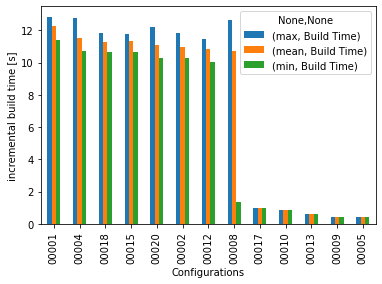

In [24]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

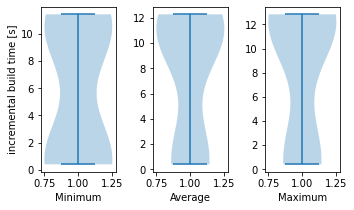

In [25]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [31]:
# Converting the Pivot Table to Data Frame

ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time"
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)

tbl = tbl.set_index("Br2")

pd.set_option("display.max_columns", None)

#tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
#                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
#                '00015', '00016', '00017', '00018', '00019', '00020']]

# Export it to a csv file, to use it in another notebook
tbl[:].to_csv(path + 'i_data_frame.csv', 
                index=True, 
                header=['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020'])

tbl

SyntaxError: invalid syntax (<ipython-input-31-8d4154085ae9>, line 24)